In [1]:
from sklearn.svm import SVC, SVR, NuSVC, LinearSVC
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
def add_gaussian_noise(data, mean=0, std_dev=4):
    noise = np.random.normal(mean, std_dev, data.shape)
    noisy_data = data + noise
    return noisy_data

In [4]:
def downsample(data):
  return data[:, ::10, :]

In [5]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)  # Convert DataFrame to NumPy array

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal = np.concatenate(normal_data, axis=0)
add_weight = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant = np.concatenate(PressureGain_constant_data, axis=0)


In [6]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal_test = np.concatenate(normal_data, axis=0)
add_weight_test = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight_test = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad_test = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant_test = np.concatenate(PressureGain_constant_data, axis=0)


In [7]:
def apply_2d_fft(data):
    # Apply 2D FFT to each sample's feature matrix
    fft_result = np.fft.fft2(data)
    magnitude_spectrum = np.abs(fft_result)
    return magnitude_spectrum

In [8]:
sample_len = 20  # Length of each sample

# Function to split raw data into samples of fixed length
def split_into_samples(data, sample_len=20):
    num_features = data.shape[1]
    num_samples = data.shape[0] // sample_len
    trimmed_data = data[:num_samples * sample_len]
    return trimmed_data.reshape(num_samples, sample_len, num_features)

# Split training data per class
normal_split = split_into_samples(normal, sample_len)
add_weight_split = split_into_samples(add_weight, sample_len)
slight_split = split_into_samples(PropellerDamage_slight, sample_len)
bad_split = split_into_samples(PropellerDamage_bad, sample_len)
pressure_split = split_into_samples(PressureGain_constant, sample_len)

# Split testing data per class (using *_test arrays)
normal_split_test = split_into_samples(normal_test, sample_len)
add_weight_split_test = split_into_samples(add_weight_test, sample_len)
slight_split_test = split_into_samples(PropellerDamage_slight_test, sample_len)
bad_split_test = split_into_samples(PropellerDamage_bad_test, sample_len)
pressure_split_test = split_into_samples(PressureGain_constant_test, sample_len)

# Show shapes of training sets
print("normal_split:", normal_split.shape)
print("add_weight_split:", add_weight_split.shape)
print("PropellerDamage_slight_split:", slight_split.shape)
print("PropellerDamage_bad_split:", bad_split.shape)
print("PressureGain_constant_split:", pressure_split.shape)

# Show shapes of test sets
print("normal_split_test:", normal_split_test.shape)
print("add_weight_split_test:", add_weight_split_test.shape)
print("PropellerDamage_slight_split_test:", slight_split_test.shape)
print("PropellerDamage_bad_split_test:", bad_split_test.shape)
print("PressureGain_constant_split_test:", pressure_split_test.shape)


normal_split: (504, 20, 17)
add_weight_split: (490, 20, 17)
PropellerDamage_slight_split: (490, 20, 17)
PropellerDamage_bad_split: (489, 20, 17)
PressureGain_constant_split: (490, 20, 17)
normal_split_test: (303, 20, 17)
add_weight_split_test: (293, 20, 17)
PropellerDamage_slight_split_test: (294, 20, 17)
PropellerDamage_bad_split_test: (294, 20, 17)
PressureGain_constant_split_test: (294, 20, 17)


In [9]:
# Apply 2D FFT and downsampling to all training classes
normal_fft = downsample(np.array([apply_2d_fft(sample) for sample in normal_split]))
add_weight_fft = downsample(np.array([apply_2d_fft(sample) for sample in add_weight_split]))
slight_fft = downsample(np.array([apply_2d_fft(sample) for sample in slight_split]))
bad_fft = downsample(np.array([apply_2d_fft(sample) for sample in bad_split]))
pressure_fft = downsample(np.array([apply_2d_fft(sample) for sample in pressure_split]))

# Apply 2D FFT and downsampling to all test classes
normal_fft_test = downsample(np.array([apply_2d_fft(sample) for sample in normal_split_test]))
add_weight_fft_test = downsample(np.array([apply_2d_fft(sample) for sample in add_weight_split_test]))
slight_fft_test = downsample(np.array([apply_2d_fft(sample) for sample in slight_split_test]))
bad_fft_test = downsample(np.array([apply_2d_fft(sample) for sample in bad_split_test]))
pressure_fft_test = downsample(np.array([apply_2d_fft(sample) for sample in pressure_split_test]))

# Display the shape of each processed training class
print("normal_fft:", normal_fft.shape)
print("add_weight_fft:", add_weight_fft.shape)
print("slight_fft:", slight_fft.shape)
print("bad_fft:", bad_fft.shape)
print("pressure_fft:", pressure_fft.shape)

# Display the shape of each processed test class
print("normal_fft_test:", normal_fft_test.shape)
print("add_weight_fft_test:", add_weight_fft_test.shape)
print("slight_fft_test:", slight_fft_test.shape)
print("bad_fft_test:", bad_fft_test.shape)
print("pressure_fft_test:", pressure_fft_test.shape)


normal_fft: (504, 2, 17)
add_weight_fft: (490, 2, 17)
slight_fft: (490, 2, 17)
bad_fft: (489, 2, 17)
pressure_fft: (490, 2, 17)
normal_fft_test: (303, 2, 17)
add_weight_fft_test: (293, 2, 17)
slight_fft_test: (294, 2, 17)
bad_fft_test: (294, 2, 17)
pressure_fft_test: (294, 2, 17)


In [10]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Create labels for each training class
y_normal = np.zeros(len(normal_fft))
y_add_weight = np.ones(len(add_weight_fft))
y_slight = np.full(len(slight_fft), 2)
y_bad = np.full(len(bad_fft), 3)
y_pressure = np.full(len(pressure_fft), 4)

# Create labels for each test class
y_normal_test = np.zeros(len(normal_fft_test))
y_add_weight_test = np.ones(len(add_weight_fft_test))
y_slight_test = np.full(len(slight_fft_test), 2)
y_bad_test = np.full(len(bad_fft_test), 3)
y_pressure_test = np.full(len(pressure_fft_test), 4)

# Concatenate all classes into final training and testing sets
X_train = np.concatenate([normal_fft, add_weight_fft, slight_fft, bad_fft, pressure_fft])
X_test = np.concatenate([normal_fft_test, add_weight_fft_test, slight_fft_test, bad_fft_test, pressure_fft_test])

y_train = np.concatenate([y_normal, y_add_weight, y_slight, y_bad, y_pressure])
y_test = np.concatenate([y_normal_test, y_add_weight_test, y_slight_test, y_bad_test, y_pressure_test])

# Reshape data for classifier input (flatten each sample)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# === Feature selection using SelectKBest ===
# Select top k features based on ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=8)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Print final shapes
print("shape X_train:", X_train.shape, X_test.shape)
print("shape y_train:", y_train.shape, y_test.shape)


shape X_train: (2463, 8) (1478, 8)
shape y_train: (2463,) (1478,)


In [11]:
# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## With SVC Library

In [12]:
#  SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(C=1, class_weight='balanced', random_state=42)

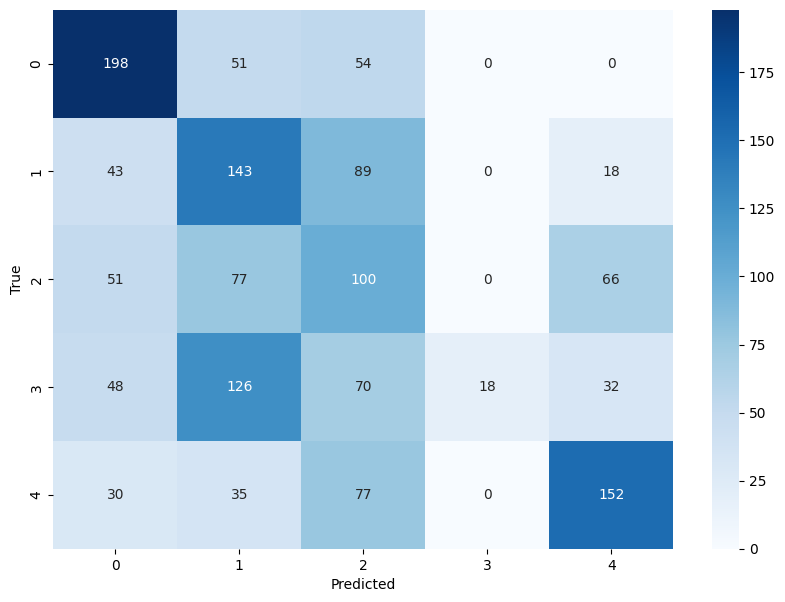

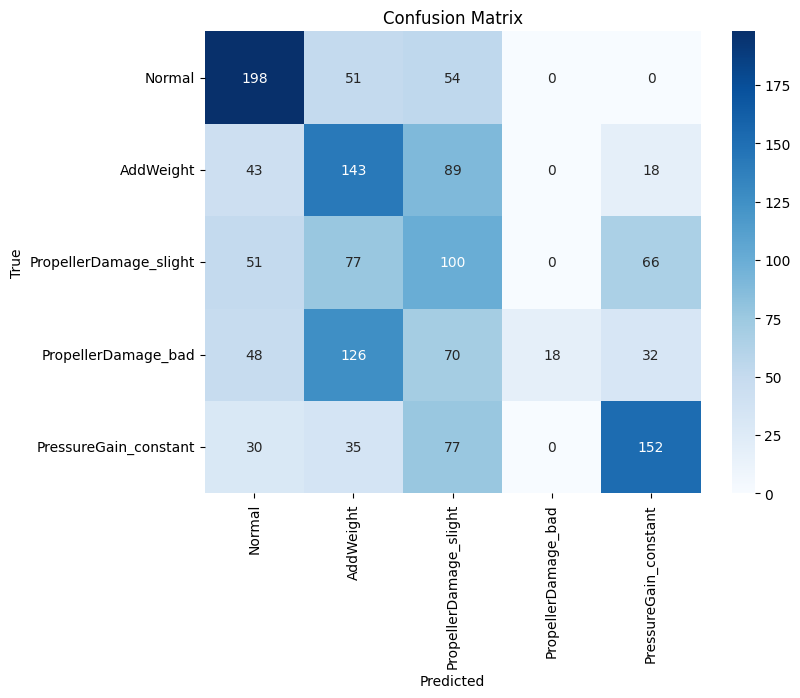

                        precision    recall  f1-score   support

                Normal       0.54      0.65      0.59       303
             AddWeight       0.33      0.49      0.39       293
PropellerDamage_slight       0.26      0.34      0.29       294
   PropellerDamage_bad       1.00      0.06      0.12       294
 PressureGain_constant       0.57      0.52      0.54       294

              accuracy                           0.41      1478
             macro avg       0.54      0.41      0.39      1478
          weighted avg       0.54      0.41      0.39      1478

Accuracy: 0.4133964817320704


In [13]:
# Prediction
y_pred_classes = svm_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_names = [
    'Normal', 
    'AddWeight', 
    'PropellerDamage_slight', 
    'PropellerDamage_bad', 
    'PressureGain_constant'
]

# rediction
y_pred_classes = svm_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(
    y_test, 
    y_pred_classes, 
    target_names=class_names
))

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

## from scratch

In [14]:
import numpy as np

# --- Basic Linear SVM (binary) ---
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [15]:
class MulticlassSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.models = {}  # class -> trained binary SVM

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            print(f"Training classifier for class {c}")
            y_binary = np.where(y == c, 1, -1)
            clf = SVM(self.learning_rate, self.lambda_param, self.n_iters)
            clf.fit(X, y_binary)
            self.models[c] = clf

    def predict(self, X):
        scores = []
        for c in self.classes:
            clf = self.models[c]
            score = np.dot(X, clf.w) + clf.b
            scores.append(score)
        scores = np.array(scores)  # shape: (n_classes, n_samples)
        return self.classes[np.argmax(scores, axis=0)]


In [16]:
multi_svm = MulticlassSVM()
multi_svm.fit(X_train_scaled, y_train)



Training classifier for class 0.0
Training classifier for class 1.0
Training classifier for class 2.0
Training classifier for class 3.0
Training classifier for class 4.0


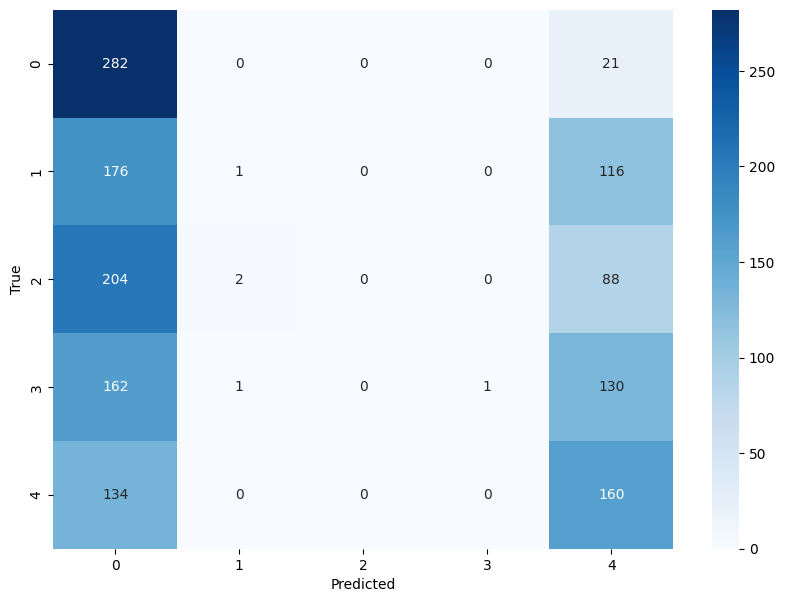

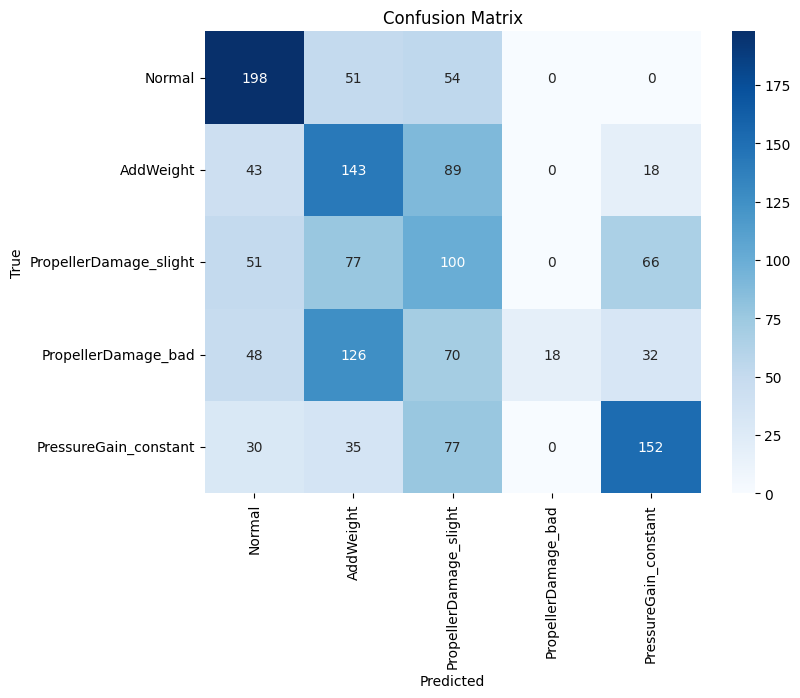

                        precision    recall  f1-score   support

                Normal       0.54      0.65      0.59       303
             AddWeight       0.33      0.49      0.39       293
PropellerDamage_slight       0.26      0.34      0.29       294
   PropellerDamage_bad       1.00      0.06      0.12       294
 PressureGain_constant       0.57      0.52      0.54       294

              accuracy                           0.41      1478
             macro avg       0.54      0.41      0.39      1478
          weighted avg       0.54      0.41      0.39      1478

Accuracy: 0.4133964817320704


In [17]:
# Prediction
y_pred_classes = multi_svm.predict((X_test_scaled))


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Report of classification
class_names = [
    'Normal', 
    'AddWeight', 
    'PropellerDamage_slight', 
    'PropellerDamage_bad', 
    'PressureGain_constant'
]

# پیش‌بینی
y_pred_classes = svm_model.predict(X_test_scaled)

# ماتریس سردرگمی
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# گزارش طبقه‌بندی با ۵ نام
print(classification_report(
    y_test, 
    y_pred_classes, 
    target_names=class_names
))

# دقت کلی
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)